In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, widgets, GridBox, Layout
import threading

def plot_pendulum_direction_field(length,gravity,u,a,w):
    # 创建网络
    [theta,omega] = np.meshgrid(np.linspace(-3*np.pi, 3*np.pi, 32), np.linspace(-4,4,16)) # [角度，角速度]

    # 计算微分
    dtheta = omega
    domega = -u*omega + (-gravity/length)*np.sin(theta)
    
    # 绘图
    plt.quiver(theta, omega,dtheta, domega,alpha=0.1*a,color='red',width=0.001*w)
    plt.gca().set_aspect('equal')
    plt.xlabel(r'angle ($\theta$)')
    plt.ylabel(r'angular velocity ($\omega$)')
    plt.title(r'Pendulum Direction Field $\ddot{\theta}(t)=-u*\dot{\theta}(t) - (\frac{g}{L})sin(\theta(t))$')



# 创建滑动条
L_slider = widgets.FloatSlider(min=1, max=10, step=1, value=5.0, description="摆长")
g_slider = widgets.FloatSlider(min=5, max=20, step=1, value=9.81, description="重力加速度")
u_slider = widgets.FloatSlider(min=0.1, max = 1, step = 0.1, value = 0.4, description="空气阻力")
alpha_slider = widgets.FloatSlider(min=1, max = 10, step = 1, value = 5, description="透明度")
width_slider = widgets.FloatSlider(min=1, max = 5, step = 1, value = 3, description="箭头线宽") 


# 设置布局参数
L_slider.layout = Layout(width='auto');
g_slider.layout = Layout(width='auto');
u_slider.layout = Layout(width='auto');
alpha_slider.layout = Layout(width='auto');
width_slider.layout = Layout(width='auto');

#grid = GridBox(children=[L_slider,g_slider,alpha_slider,width_slider],
#               layout = widgets.Layout(grid_template_columns='50%,50%'))

interact(plot_pendulum_direction_field, length=L_slider, gravity=g_slider,u=u_slider, a=alpha_slider, w=width_slider)


interactive(children=(FloatSlider(value=5.0, description='摆长', layout=Layout(width='auto'), max=10.0, min=1.0,…

<function __main__.plot_pendulum_direction_field(length, gravity, u, a, w)>

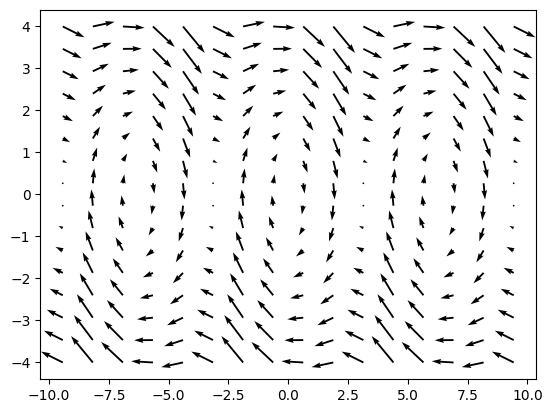

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 创建16X16的网格
[theta, omega] = np.meshgrid(np.linspace(-3*np.pi, 3*np.pi, 16), 
                          np.linspace(-4, 4, 16))
dtheta = omega
length = 1
gravity = 3
domega = -0.5*omega - (gravity/length)*np.sin(theta)    
fig, ax = plt.subplots()

q = ax.quiver(theta,omega,dtheta,domega)

def update_pendulum_direction_field(paras):
    length = paras[0]
    gravity = paras[1]
    print(gravity)

    # 更新向量
    domega = -0.5*omega - (gravity/length)*np.sin(theta)    
    q.set_UVC(dtheta,domega) 

paras=[[1,4],[1,5],[1,6],[1,7],[1,8],[1,9],[1,10]]
ani = animation.FuncAnimation(fig, update_pendulum_direction_field,paras,interval=500 )
plt.show()
